## TSF Task 3: Exploratory Data Analysis - Retail
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

Dataset: https://bit.ly/3i4rbWl

### Problem statement -  try to find out the weak areas where you can work to make more profit.

# Author: Nenavath Krishna

In [1]:
# importing some relavent libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset using pandas
pd.set_option('display.max_column', 1000)
pd.set_option('display.max_row', 1000)
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# seeing the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# cheking the Missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# seeing the how many unique values are there in features of dataset.
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

It can be clearly seen that for 3 categories(total subcategories are 17) of products are there, only 4 types of shipping modes in 4 different regions among 49 different states of the same country. Also there are only 3 segments among whom the products are distributed.

In [9]:
# Checking the skewness of the data is it distributed normally or not.
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Sales,12.970805
Profit,7.560297
Discount,1.684042
Quantity,1.278353
Postal Code,-0.128506


we saw that the skewness of the data it is clear that sales and profit is not distributed normally.

### correlation between each feature of data

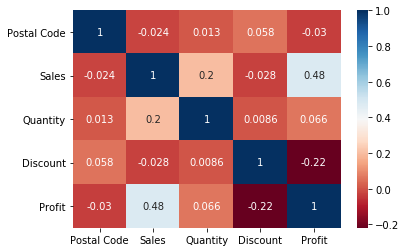

In [10]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
cor = data.corr()# here corr is an correlation between each feature of data
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu)
plt.show()

Here profit and sales having the high correlation

In [11]:
#Correlation with output variable
cor_target = abs(cor["Profit"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Postal Code    0.029961
Sales          0.479064
Quantity       0.066253
Discount       0.219487
Profit         1.000000
Name: Profit, dtype: float64

### droping the useless columns

In [12]:
df= data.drop(['Postal Code', 'Country'], axis=1)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


###  pairplot
pairplot is a great way to create scatterplots between all of our variables.
This scatterplot shows the relationship between all of our variables.

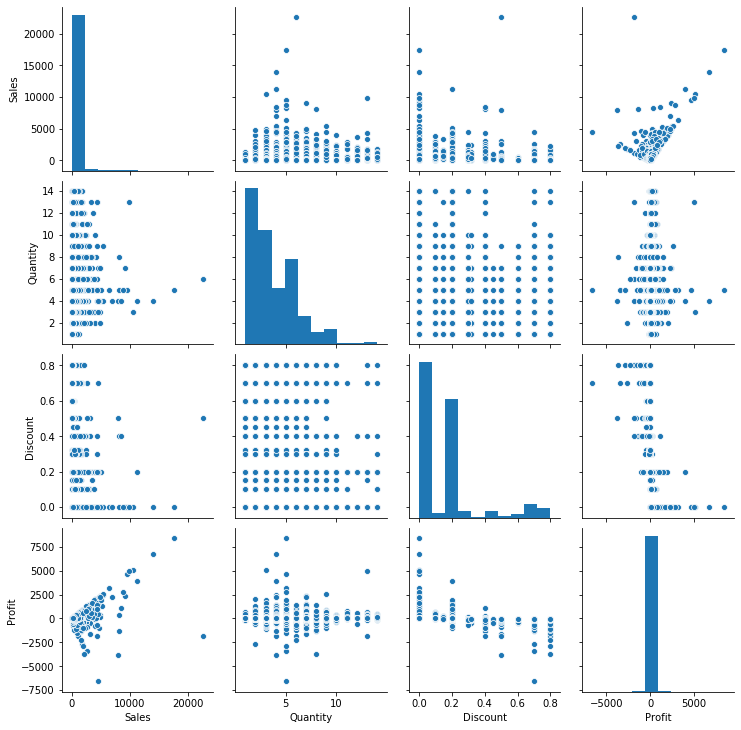

In [13]:
sns.pairplot(df)

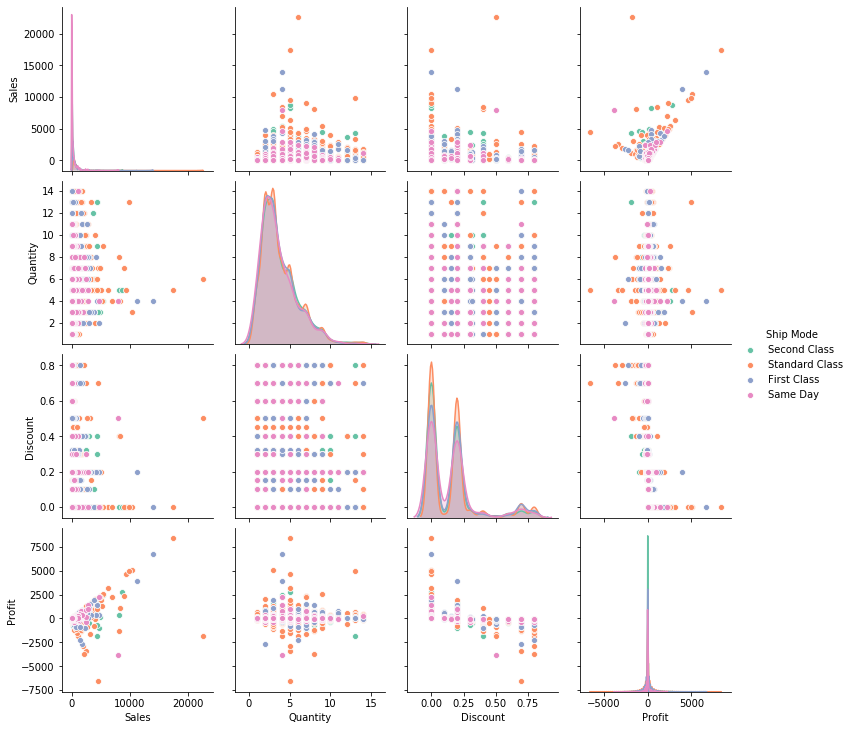

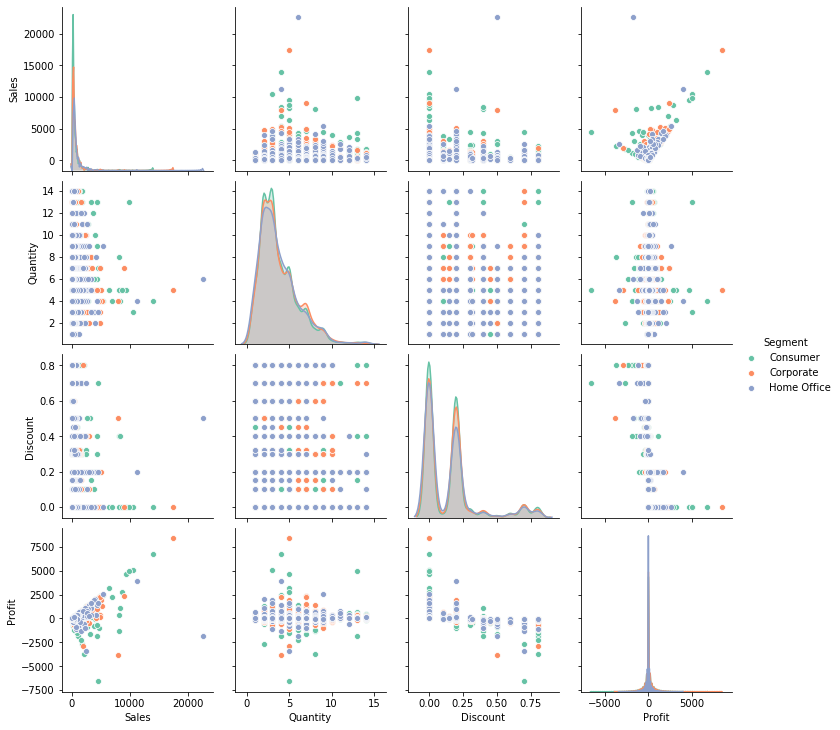

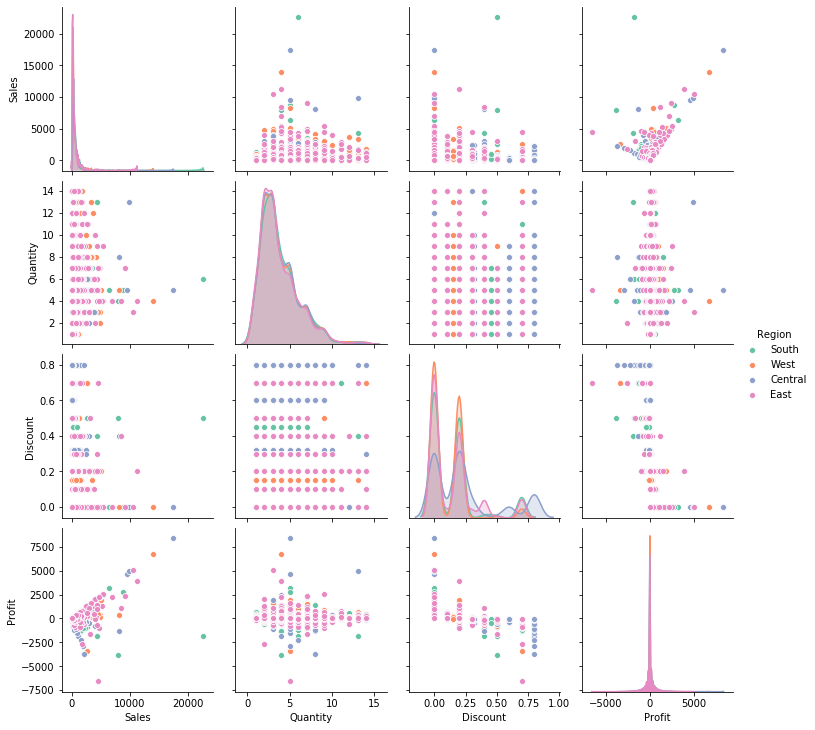

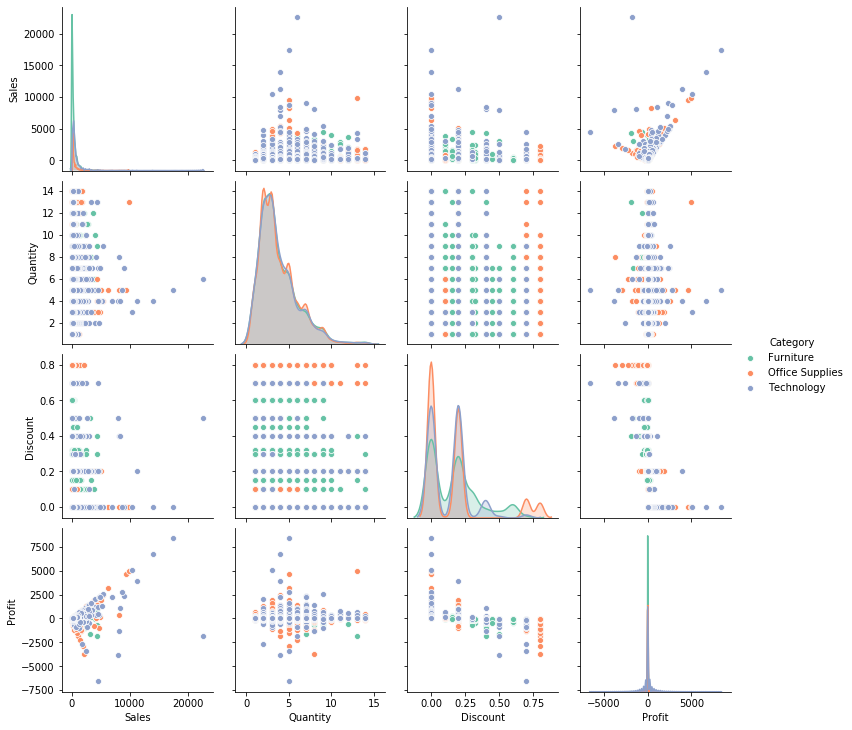

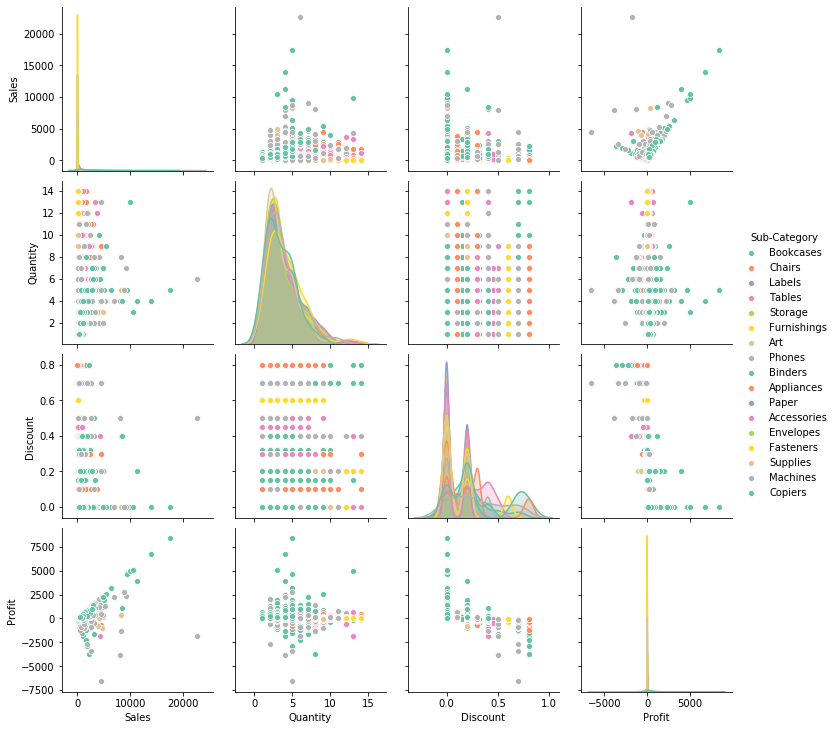

In [14]:
# Pairplot based on Ship Mode
sns.pairplot(df, hue="Ship Mode", palette="Set2")
# Pairplot based on Segment
sns.pairplot(df, hue="Segment", palette="Set2")
# Pairplot based on Region
sns.pairplot(df, hue="Region", palette="Set2")
# Pairplot based on Category
sns.pairplot(df, hue="Category", palette="Set2")
# Pairplot based on Sub-Category
sns.pairplot(df, hue="Sub-Category", palette="Set2")

plt.show()

##### From the pairplots above based on different features it can be seen that the profit is a mixture of all categories in features, may it be 'Categories', 'Region', 'Ship Mode', 'Segment' and this is true in real life scenarios also.

Text(0.5, 1.0, 'SuperStore category')

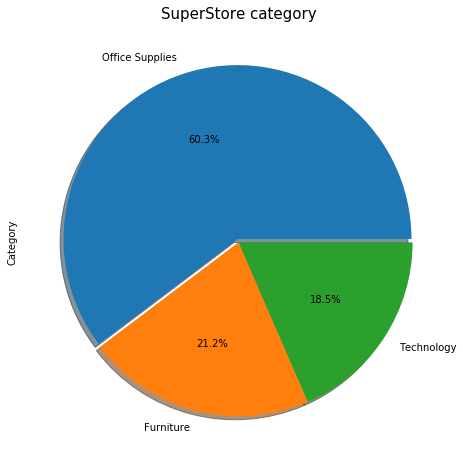

In [15]:
plt.figure(figsize=(18,8))
cat=df['Category'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.02, 0, 0))
plt.title('SuperStore category', fontsize=15)

Text(0.5, 1.0, 'SuperStore-sub category')

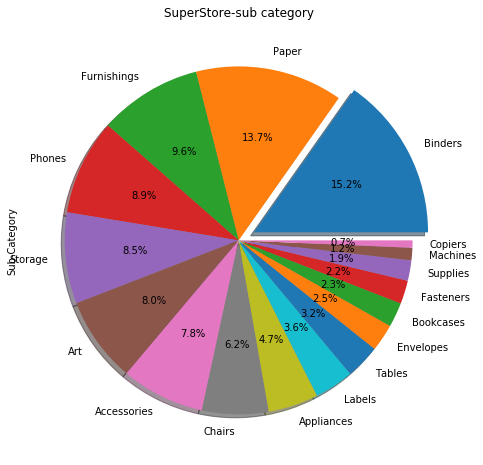

In [16]:
plt.figure(figsize=(18,8))
sub_cat=df['Sub-Category'].value_counts()

theme=plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title('SuperStore-sub category')

Text(0.5, 1.0, 'Category vs Sub Category')

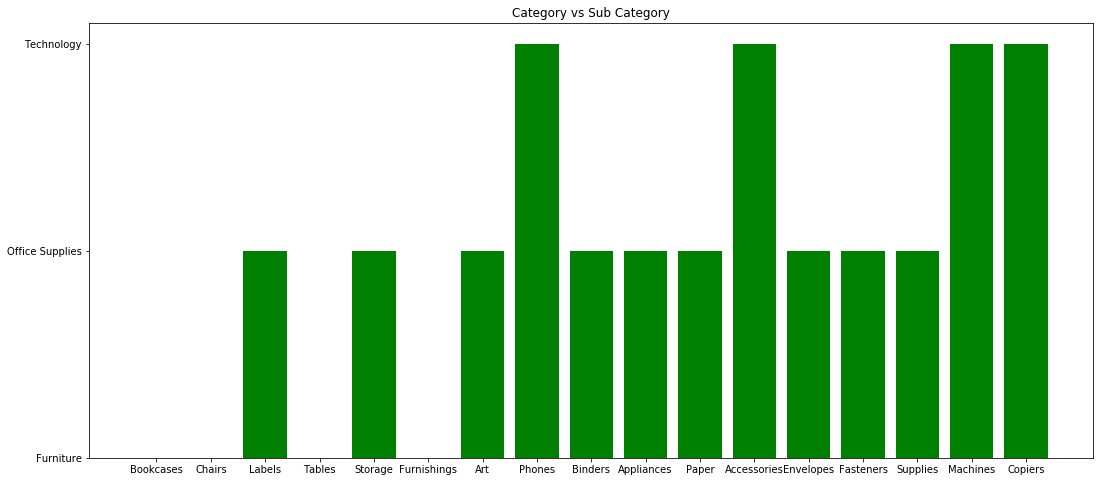

In [17]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=df, color='g');
plt.title('Category vs Sub Category')

This graph can easily help to makeout which subcategory to choose when purchasing a product.

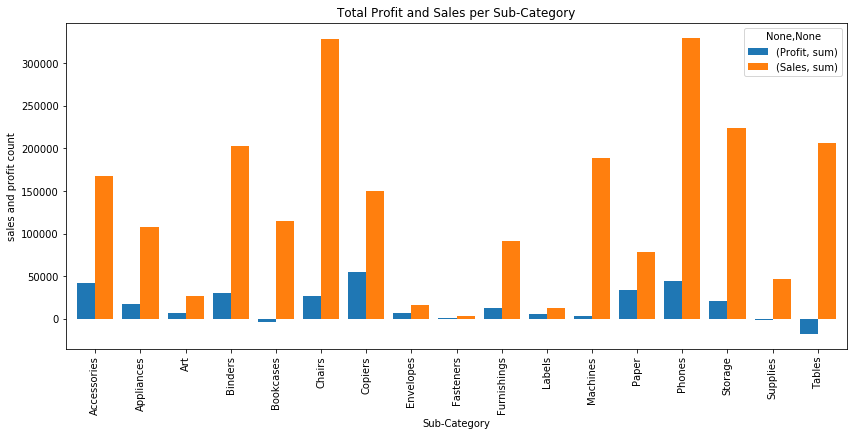

In [18]:
sale_profit_sum=df.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.xlabel('Sub-Category')
plt.ylabel('sales and profit count')
plt.title('Total Profit and Sales per Sub-Category');

The above barplot depicts a lot about the profit gained from selling various products. Though sales for various products is high but they have a very low profit margin. Sub_Categoried like Machines, Bookcases, Tables etc. may have high sale but the profit is very low or negative(in case of Tables). On the other hand products like Copiers, Paper comparitively have less sales but give more profit. This just shows the random behaviour in which a market acts.

# visualizing the how muchproducts distributed regionwise

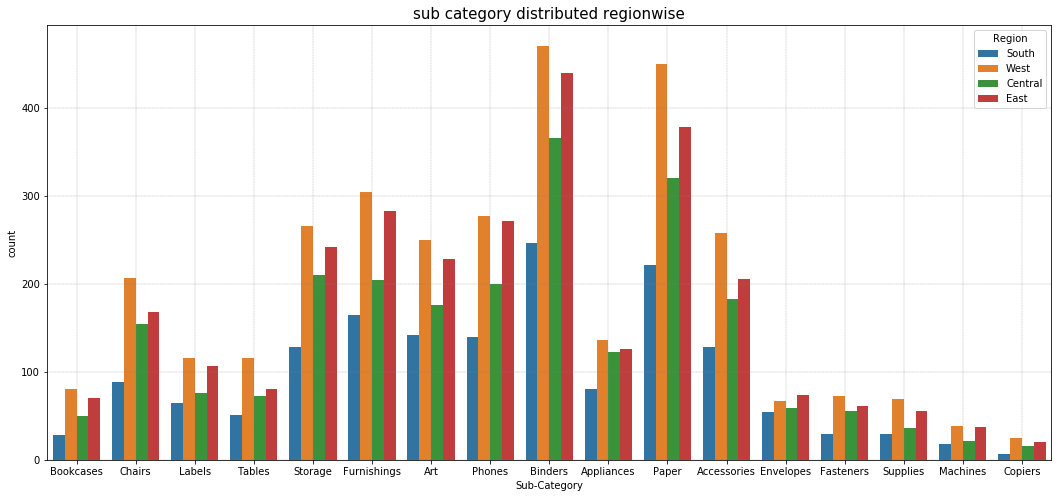

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x='Sub-Category', hue='Region')
plt.title('sub category distributed regionwise', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

In [20]:
# creating new frature which contains cost of the product in dataset
df['Cost']=df['Sales']-df['Profit']
df['Cost']

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9989      21.1452
9990      76.3268
9991     239.1828
9992      16.2800
9993     170.2120
Name: Cost, Length: 9994, dtype: float64

In [21]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,21.1452
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,76.3268
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,239.1828
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,16.2800


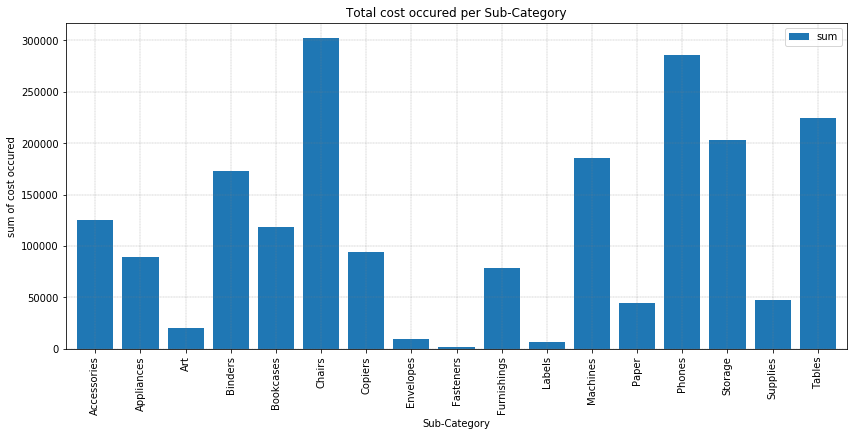

In [29]:
cost_occured=df.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6))
plt.xlabel('Sub-Category')
plt.ylabel('sum of cost occured')
plt.title('Total cost occured per Sub-Category')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

In [22]:
df['Profit %']=(data['Profit']/df['Cost'])*100
df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


From above it is very much clear that retailers selling phones and paper got a 100% profit.

In [23]:

# Count the total repeatable states
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

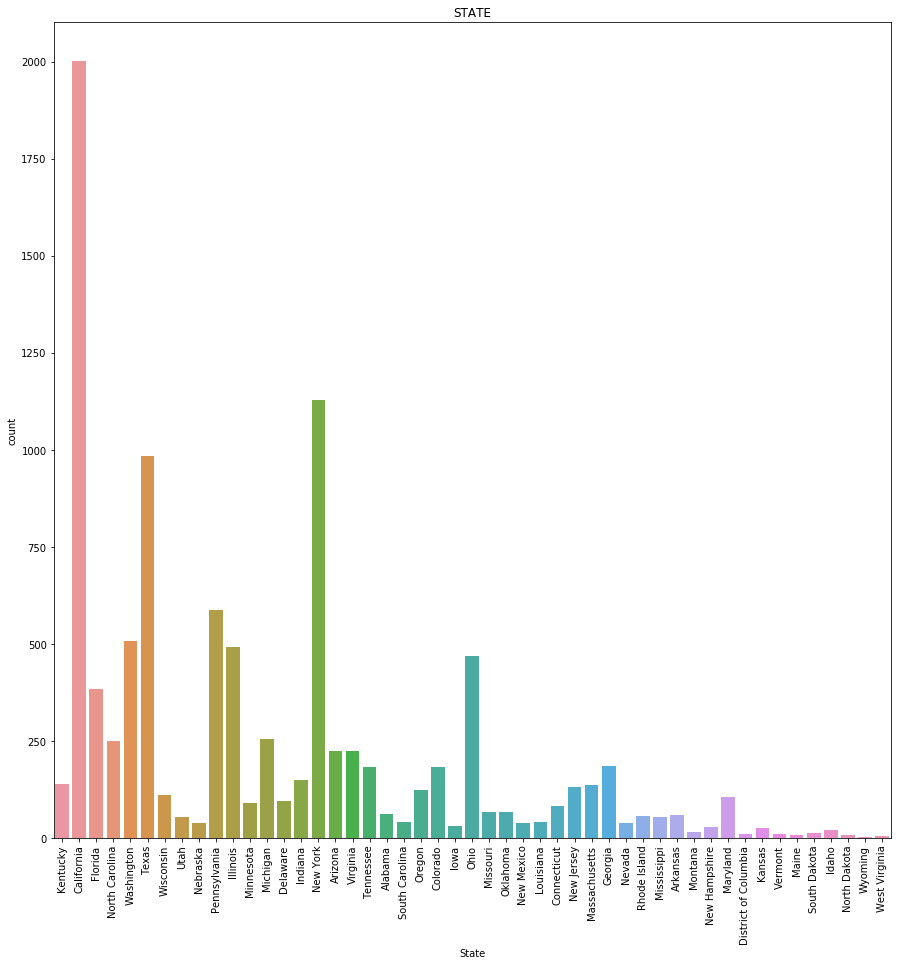

In [24]:
# seeing the total repeatable states
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

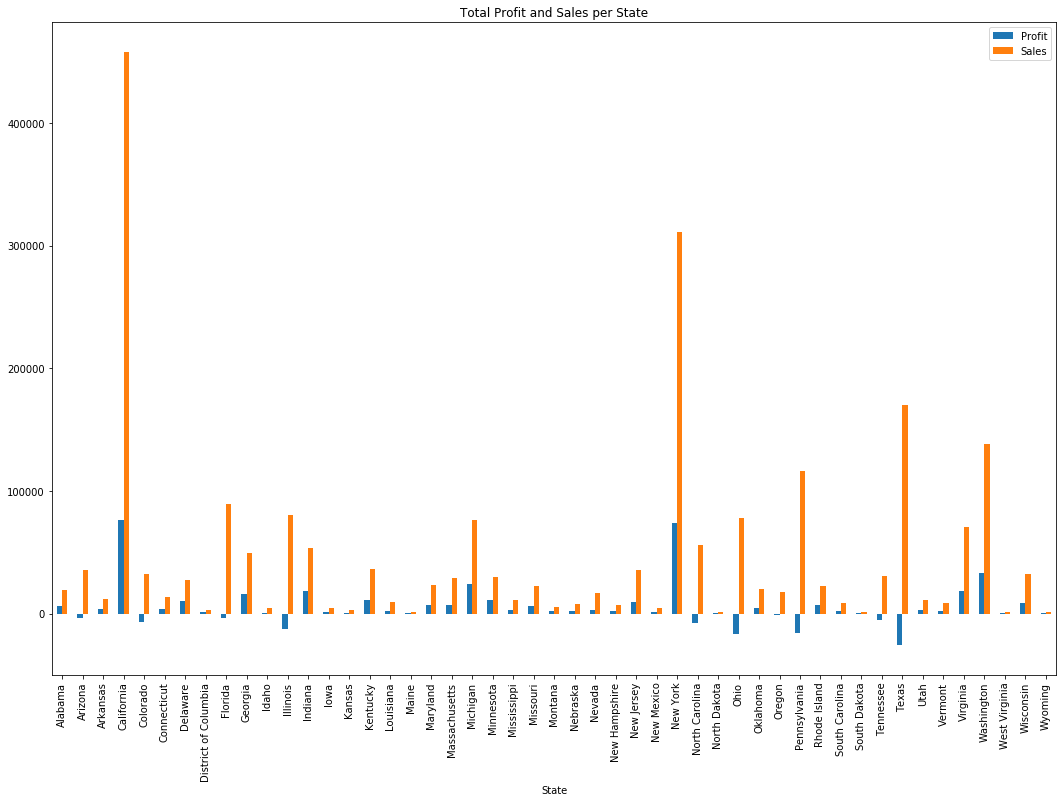

In [25]:
# Sales and Profit according to the states depicts how profit and sales are distributed among different states.
df.groupby('State')['Profit','Sales'].agg(sum).plot.bar(figsize=(18,12))
plt.title('Total Profit and Sales per State');


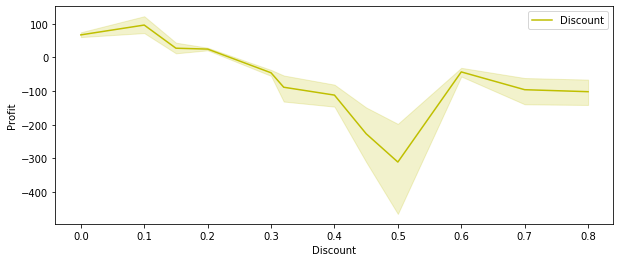

In [26]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=df , color='y',label='Discount')
plt.legend()
plt.show()

Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.

In [27]:
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data1 = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (24,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data1.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

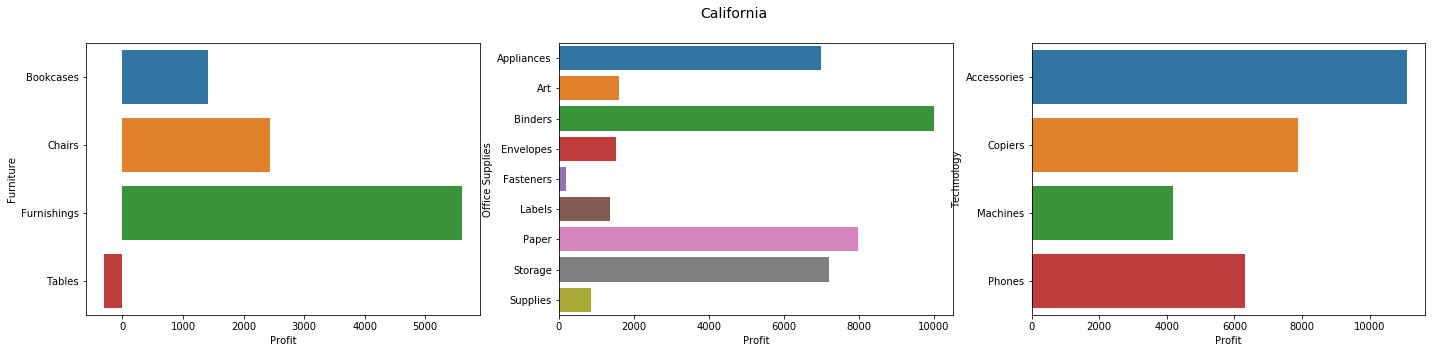

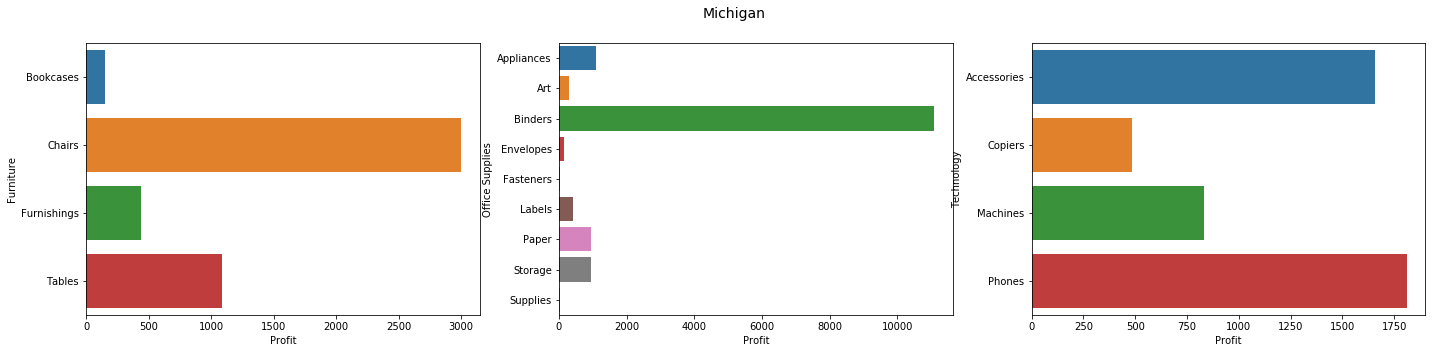

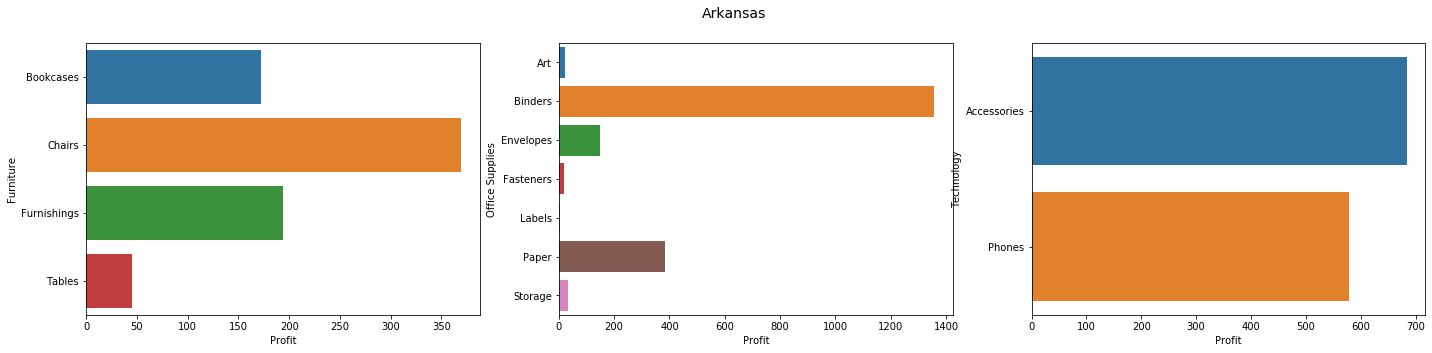

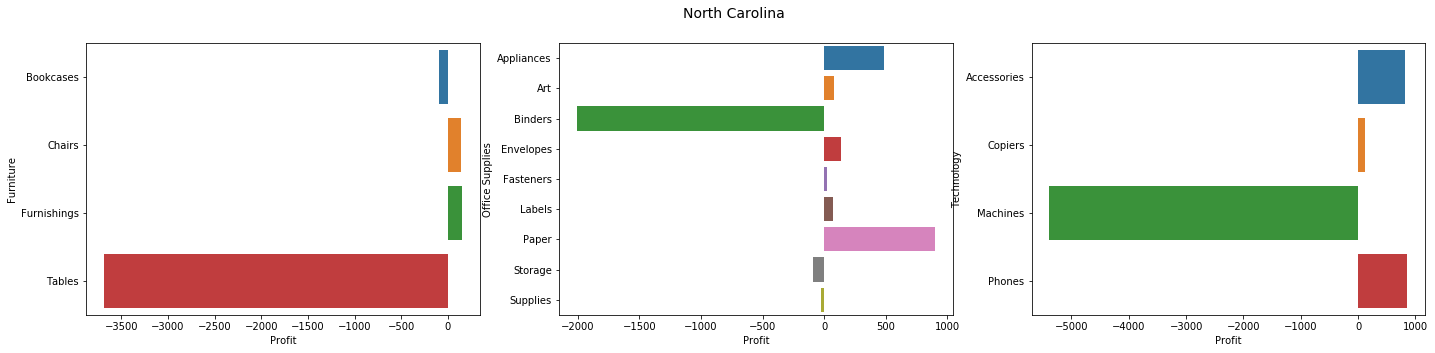

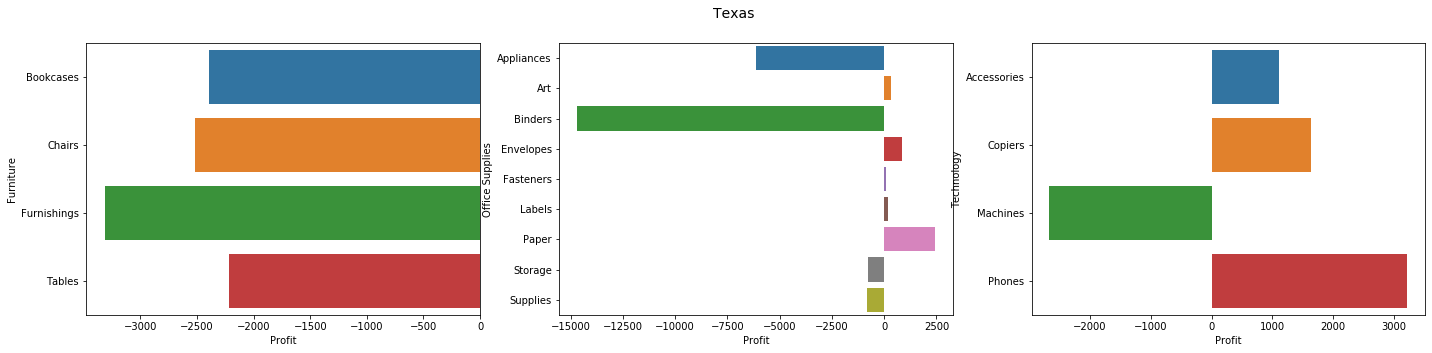

In [28]:
states = ['California', 'Michigan', 'Arkansas', 'North Carolina', 'Texas']
state_data_viewer(states)

From the Above data Visualization we can see that in which States and in which Category the Sales and profits are High or less, we can improve in that States by providing Discounts in prefered range so that company and cosumer both will be in profit.